# Bootstrap CI demo

For detecting significant event transients in time series data.

In [4]:
from itertools import groupby
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

from bootstrap_ci import BootCI

In [5]:
project_path = Path.cwd().parents[0]
data_path = Path(project_path / "data/")

## data structure:
- row: a subject's trial-averaged data
- column: the trial timepoints

## Replicate ERT bootstrapping result

In [6]:
import h5py

ert_file = list(Path(data_path).glob("*ERT*.mat"))[0]
f = h5py.File(ert_file)
arrays = {}

for key, value in f.items():
    arrays[key] = np.array(value)
    
# f['ERT_test'].keys()
cp = pd.DataFrame(f["ERT_test"]["Cp_off1"]).T
cm = pd.DataFrame(f["ERT_test"]["Cm_off3"]).T
cp_raw = cp.copy()
cp_raw.shape

(23, 9156)

In [7]:
cp_data = BootCI(cp_raw)
cp_data.bootstrap_CI(n_boots=1000)
cp_data.get_sig_events(num_consec=12)


cm_data = BootCI(cm)
cm_data.bootstrap_CI(n_boots=1000)
cm_data.get_sig_events(num_consec=12)

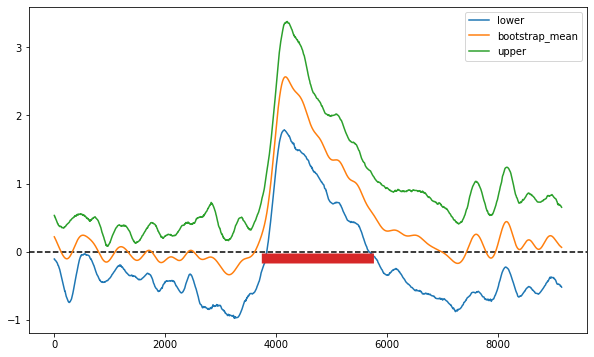

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.axhline(y=0, color='black', ls='--')
ax.plot(cp_data.ci_lower, label='lower')
ax.plot(cp_data.boot_samples.mean(axis=0), label='bootstrap_mean')
ax.plot(cp_data.ci_upper, label='upper')

ax.legend()


for evt in cp_data.sig_events["lower"]:
    # height = ert_raw.mean(axis=0).max() * 1.5
    height = -0.1
    ax.plot(
        cp_raw.mean().iloc[evt].index, np.full_like(evt[:], height, dtype="float"), lw=10
    )